In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings

import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
import math

In [2]:
from sklearn.model_selection import train_test_split 

dataset = pd.read_excel('All_data.xlsx')

X_cols, y_col = ['T2LM (ms)', 'T (K)', 'TE (ms)'], 'Eta (cP)'
X, y = dataset[X_cols],  dataset[y_col]

def engineering(df):
    df['feature_0'] = np.log(df['T2LM (ms)'])
    #df['feature_1'] = 1. / (df['TE (ms)'] * df['T2LM (ms)'])
    df['feature_2'] = np.log(df['T (K)']) / df['TE (ms)']
    df['feature_3'] = np.log(df['T2LM (ms)']) / df['TE (ms)']
    #df['feature_4'] = np.log(df['TE (ms)']) / df['TE (ms)']
    df['feature_5'] = np.log(df['T (K)'])
    #df['feature_6'] = np.log(df['T (K)'])
    return df

X = engineering(X) # comment this to disable feature engineering 
Z_col = ['T2LM (ms)', 'T (K)','feature_0','feature_2','feature_3','feature_5']
Z = X[Z_col]

X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = 0.25, random_state = 42) #Kad koristim bez FE - X PROMENI u Z 
                                                    #OVDE NAZAD U Z

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print(Z) #STAVI NAZAD U Z

(211, 6) (211,)
(71, 6) (71,)
       T2LM (ms)   T (K)  feature_0  feature_2  feature_3  feature_5
0       2.020000  303.15   0.703098  57.142277   7.030975   5.714228
1       0.988897  312.15  -0.011165  23.931183  -0.046521   5.743484
2       1.467505  327.15   0.383564  24.126745   1.598182   5.790419
3       6.199510  376.15   1.824470  24.708283   7.601959   5.929988
4      10.880354  394.15   2.386959  24.903048   9.945662   5.976732
5       0.620000  303.15  -0.478036  57.142277  -4.780358   5.714228
6       1.278509  303.15   0.245694  19.047426   0.818981   5.714228
7       9.181639  389.15   2.217206  24.849854   9.238357   5.963965
8       3.049576  354.15   1.115003  24.457169   4.645844   5.869721
9       1.320000  303.15   0.277632  57.142277   2.776317   5.714228
10    156.800000  303.15   5.054971  57.142277  50.549711   5.714228
11    320.410000  303.15   5.769601  57.142277  57.696014   5.714228
12      0.490000  303.15  -0.713350  57.142277  -7.133499   5.714228
13  

In [3]:
Z[['feature_0','feature_2','feature_3','feature_5']].describe()

,feature_0,feature_2,feature_3,feature_5
count,282.000000,282.000000,282.000000,282.000000
mean,2.081395,34.550016,14.743473,5.813236
std,1.912952,16.258707,19.235358,0.124885
min,-1.469676,19.047426,-14.696760,5.700945
25%,0.582466,23.987526,2.517622,5.714228
50%,1.641011,24.822996,7.009809,5.778117
75%,3.429946,57.142277,16.833279,5.891367
max,7.122786,57.142277,71.227860,6.148789


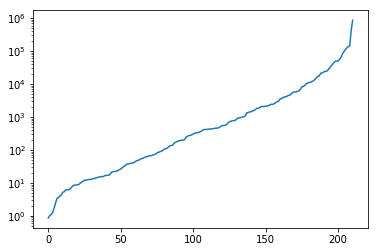

In [4]:
plt.yscale('log')
plt.plot(sorted(y_train))

# try to predict log(Eta (cP))
y_train = np.log(y_train)
y_test = np.log(y_test)
# regular (without log)
#y_train = np.array(y_train).reshape(-1, 1)
#y_test = np.array(y_test).reshape(-1, 1)

In [5]:
from sklearn.metrics import mean_squared_log_error

def plot_results(model):
    # predict logarithms
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # back to Eta (cP)
    y_pred_train = np.exp(y_pred_train)
    y_pred = np.exp(y_pred)
    
    y_true_train = np.exp(y_train)
    y_true = np.exp(y_test)
    
    # plot
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.scatter(y_true_train, y_pred_train)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title('TRAIN Prediction. MSLE=%f' % mean_squared_log_error(y_true_train, y_pred_train))
    
    plt.subplot(1,2,2)
    plt.scatter(y_true, y_pred)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title('TEST Prediction. MSLE=%f' % mean_squared_log_error(y_true, y_pred))
    
    #print scores
    print('TRAIN scores. R2 score=%f' % r2_score(y_true_train, y_pred_train),
         'MAE=%f' % mean_absolute_error(y_true_train, y_pred_train),
         'RMSE=%f' % math.sqrt(mean_squared_error(y_true_train, y_pred_train)),
        'Adj R2=%f'% (1-(((1-r2_score(y_true_train, y_pred_train))*200)/(203))))
       
    
    print('TEST scores. R2 score=%f' % r2_score(y_true, y_pred),
         'MAE=%f' % mean_absolute_error(y_true, y_pred),
         'RMSE=%f' % math.sqrt(mean_squared_error(y_true, y_pred)),
         'Adj R2=%f'% (1-(((1-r2_score(y_true, y_pred))*70)/(63))))
         #'AARD=%f'% (np.sum(np.abs(np.subtract(y_true, y_pred))/len(y_pred)*100)
    
    #Preparation for export to excel 
    df = pd.DataFrame(y_pred)
    dt = df.to_excel (r'C:\Users\strahinja.markovic\Google Drive\PhD\Articles-Research Papers\Article_NMR_ML_Viscosity\Python\ML preds\All_data\SVR_FE_RANDOM_CV.xlsx', header = True)
    

In [15]:
# Grid Search CV 
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel':['rbf'], #['rbf', 'linear', 'sigmoid']
              'C': [16, 17, 18, 19, 20, 25, 30, 40, 50, 70, 100], 
              'gamma':['scale'],
              'epsilon':[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]}] #[0.05, 0.1, 0.5]}]#['auto','scale']}] #['auto','scale']
grid_search = GridSearchCV(estimator = svr, 
                           param_grid = parameters, 
                           cv=5)
grid_search = grid_search.fit(X_train, y_train.ravel())
print(grid_search.best_params_)
print(grid_search.best_score_)

NameError: name 'svr' is not defined

In [6]:
# Randomized Grid Search
from sklearn.model_selection import RandomizedSearchCV

parameters = {'kernel':['rbf'], #['rbf', 'linear', 'sigmoid']
              'C': [16, 17, 18, 19, 20, 30, 50, 70, 100], 
              'gamma':['scale', 0.005, 0.01],
             'epsilon':[0.0005, 0.001, 0.01, 0.05, 0.08, 0.1]} #['auto','scale']
random_search = RandomizedSearchCV(estimator = svr,
                                  param_distributions = parameters,
                                  cv=10,
                                  n_iter = 40)
random_search.fit(X_train, y_train.ravel())
print(random_search.multimetric_)
random_search.best_params_

False


{'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.001, 'C': 19}

TRAIN scores. R2 score=0.346581 MAE=6876.604748 RMSE=55594.593679 Adj R2=0.356237
TEST scores. R2 score=0.946684 MAE=1957.045872 RMSE=6720.216205 Adj R2=0.940760


(178, 6)

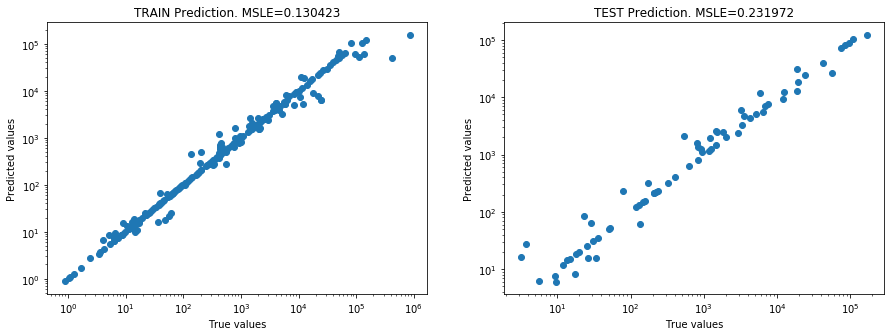

In [6]:
#SVR
from sklearn.svm import SVR
params = {'C':50}
svr = SVR(kernel = 'rbf', gamma = 'scale', epsilon = 0.001, C = 19)
svr.fit(X_train, y_train)


plot_results(svr)
s_vect_no = svr.support_vectors_
s_vect_no.shape

In [9]:
# Export model weights
from joblib import dump, load

dump(svr, 'svr_model_weights.joblib')

['svr_model_weights.joblib']

TRAIN scores. R2 score=0.882005 MAE=2545.672343 RMSE=23624.769537 Adj R2=0.883749
TEST scores. R2 score=0.935646 MAE=2893.400093 RMSE=7383.110988 Adj R2=0.928496


2

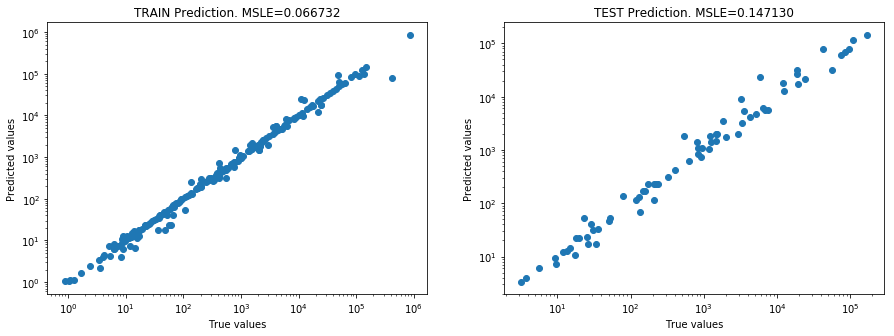

In [10]:
#Gradient Boosting Regression Trees
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
params = {'n_estimators': 500}
gb = GradientBoostingRegressor(n_estimators = 500, criterion = 'mae', loss = 'lad', learning_rate = 0.06, max_features = 'log2', subsample = 1, random_state = 42)
gb.fit(X_train, y_train)

plot_results(gb)
gb.max_features_

In [ ]:
# Grid Search CV 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor

gb_cv=GradientBoostingRegressor()

parameters = [{'loss':['lad'],
              'n_estimators':[50, 100, 300, 500, 800], #determined from the deviance plot
              'criterion':['mae'],
              'learning_rate':[0.01, 0.06, 0.08, 0.1], #determined by gridsearch
              'max_features':['log2'],
              'max_depth':[3],
              'subsample':[1.0],
              'random_state':[42]}]
grid_search = GridSearchCV(estimator = gb, 
                           param_grid = parameters, 
                           cv=5)
grid_search = grid_search.fit(X_train, y_train.ravel())
grid_search.best_params_

In [ ]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gb.staged_predict(X_test)):
    test_score[i] = gb.loss_(y_pred, y_test)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

#df = pd.DataFrame(test_score)
#test_score = df.to_excel (r'C:\Users\strahinja.markovic\Google Drive\PhD\Articles-Research Papers\Article_NMR_ML_Viscosity\Python\Deviance_nLAD\Subsampling\Subs_0.1_do_500.xlsx', header = True)

#df = pd.DataFrame(gb.train_score_)
#train_score = df.to_excel (r'C:\Users\strahinja.markovic\Google Drive\PhD\Articles-Research Papers\Article_NMR_ML_Viscosity\Python\wo_feng_Deviance_train.xlsx', header = True)

In [11]:
# Export model weights
from joblib import dump, load

dump(gb, 'gb_model_weights.joblib')


['gb_model_weights.joblib']